In [105]:
import math, cmath
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def get_transform_matrix(n):
    ksi = complex(math.cos(2*math.pi / n), - math.sin(2 * math.pi / n)) 
    matrix = np.ones((n, n), dtype=complex)
    for i in range(n):
        for j in range(n):
            matrix[i,j] = ksi ** (i * j)
    return matrix

# DFT

In [43]:
def dft(x):
    return get_transform_matrix(x.shape[0]) @ x

In [44]:
testVector = np.array([2,4,5,6])

In [45]:
dft(testVector)

array([ 17. +0.00000000e+00j,  -3. +2.00000000e+00j,  -3. -1.46957616e-15j,
        -3. -2.00000000e+00j])

In [54]:
np.fft.fft(testVector)

array([ 17.+0.j,  -3.+2.j,  -3.+0.j,  -3.-2.j])

# IDFT

In [60]:
def idft(y):
    return np.conj(dft(np.conj(y))) / y.shape[0]

In [61]:
idft(dft(testVector))

array([ 2. -1.05471187e-15j,  4. -2.87297398e-16j,  5. +1.49369888e-16j,
        6. +4.44089210e-16j])

In [62]:
np.fft.ifft(np.fft.fft(testVector))

array([ 2.+0.j,  4.+0.j,  5.+0.j,  6.+0.j])

# FFT

In [78]:
def get_d_vector(n):
    ksi = complex(math.cos(2*math.pi / n), - math.sin(2 * math.pi / n))
    return np.array([ksi ** i for i in range(n//2)], dtype=complex)

In [79]:
def fft(x):
    n = x.shape[0]

    if n == 2:
        return dft(x)

    else:
        even = x[::2]
        odd = x[1::2]
        d = get_d_vector(n)

        fftEven = fft(even)
        fftOdd = fft(odd)
        return np.append(fftEven + (d * fftOdd), fftEven - (d * fftOdd))

In [80]:
fft(testVector)

array([ 17.+0.j,  -3.+2.j,  -3.+0.j,  -3.-2.j])

In [81]:
idft(fft(testVector))

array([ 2. -2.77555756e-16j,  4. -4.32646832e-16j,  5. +9.38587363e-17j,
        6. -1.45349435e-16j])

# Badanie sygnałów

In [100]:
def complex_sin_signal(signal_data):
    """signal data is a list of (freq, amp, shift)"""
    return lambda x: sum([i[1] * math.sin(i[0] * x + i[2]) for i in signal_data])

In [213]:
# signal_data = [(10,4,2), (4,5,2), (5,2,3), (1,21,32), (20,2,15)]
signal_data = [(5,1,0), (50,1,0), (100,1,0)]
complex_sample_signal = complex_sin_signal(signal_data)

In [220]:
testSignal = np.array(list(map(complex_sample_signal, np.linspace(0, 8 * math.pi, 2048))))

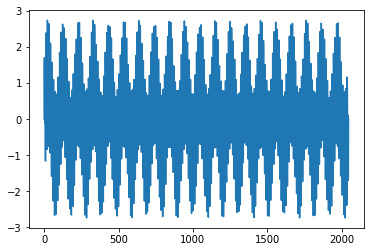

In [221]:
plt.plot(testSignal)
plt.show()

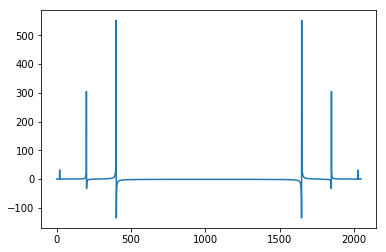

In [223]:
plt.plot(np.real(fft(testSignal)))
plt.show()

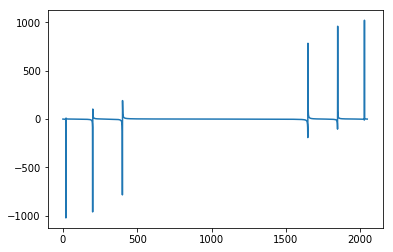

In [224]:
plt.plot(np.imag(fft(testSignal)))
plt.show()

In [225]:
def period_sin_signal(signal_data, signal_range):
    """signal data is a list of (freq, amp, shift), signal_range is a tuple containing:
    (start, stop, signal_num)"""
    breaks = np.linspace(*signal_range, len(signal_data) + 1)[1:]
    def signal(x):
        for i, signal_break in enumerate(breaks):
            if x < signal_break:
                return signal_data[i][1] * math.sin(signal_data[i][0] * x + signal_data[i][2])
        return signal_data[-1][1] * math.sin(signal_data[-1][0] * x + signal_data[-1][2])
        
    return signal

In [226]:
period_sample_signal = period_sin_signal(signal_data, [0,20])

In [230]:
periodtestSignal = np.array(list(map(period_sample_signal, np.linspace(0, 8 * math.pi, 2048))))

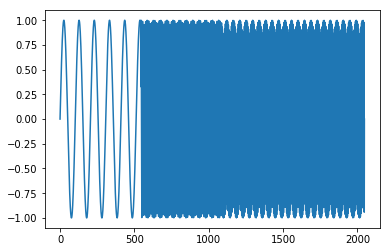

In [231]:
plt.plot(periodtestSignal)
plt.show()

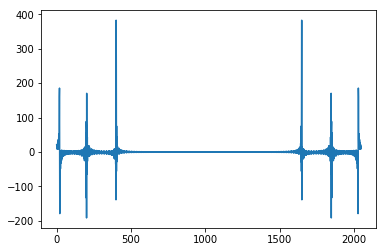

In [232]:
plt.plot(np.real(fft(periodtestSignal)))
plt.show()

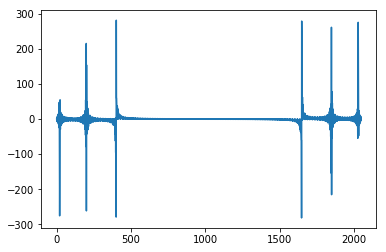

In [233]:
plt.plot(np.imag(fft(periodtestSignal)))
plt.show()